<center><img src="https://quantum.cesga.es/wp-content/uploads/2023/10/logo_Qmio_v5-azul-300x80.png" /></center>

# Iteractive Quantum Phase Estimation

## Quantum Phase Estimation (QPE) Algorithm

The **Quantum Phase Estimation (QPE)** algorithm is one of the most important quantum algorithms, designed to estimate the phase (or eigenvalue) associated with a given unitary operator $ U $. This algorithm is crucial because many quantum algorithms reduce to problems of phase estimation, especially in fields like quantum chemistry, cryptography, and linear algebra. Understanding how to estimate the eigenvalues of a unitary operator allows us to solve problems that are intractable with classical computers, such as factoring large numbers (used in Shor's algorithm), or simulating quantum systems.

### Problem Setup

Given a unitary operator $ U $, QPE aims to find an eigenvalue $ \phi $ such that:

$$
U | \psi \rangle = e^{2 \pi i \phi} | \psi \rangle
$$

Where:
- $ | \psi \rangle $ is an eigenvector of $ U $.
- $ \phi $ is the phase of the eigenvalue we wish to estimate. It is a real number between 0 and 1, ie. $\phi \in [0, 1)$, which can be written in binary form as $ \phi = 0.\phi_1 \phi_2 \dots \phi_n $.
 

### Why is QPE Important?

The Quantum Phase Estimation algorithm is crucial for a variety of quantum algorithms:

1. **Shor's Algorithm**: QPE is an integral part of Shor's algorithm, where it is used to compute the periodicity of modular exponentiation. The ability to efficiently compute the phase (or period) allows for the efficient factoring of large numbers, which is vital for breaking widely used cryptographic schemes like RSA.

2. **Quantum Simulations**: Many problems in quantum chemistry and physics require estimating the eigenvalues of Hamiltonians (energy states). QPE is the backbone of such simulations and an alternative to the **Variational Quantum Eigensolver (VQE)** method.

3. **Solving Linear Systems of Equations**: The **Harrow-Hassidim-Lloyd (HHL) algorithm** relies on QPE to solve linear systems of equations. The algorithm encodes the matrix $ A $ as a unitary operation and uses QPE to extract information about the eigenvalues, allowing for a quantum speedup in solving large linear systems.

4. **Quantum Machine Learning**: Several quantum algorithms for machine learning, such as **Quantum Principal Component Analysis (QPCA)**, involve eigenvalue estimation. In QPCA, QPE helps estimate the eigenvalues of a density matrix, allowing for dimensionality reduction on quantum data.

In all of these cases, the role of QPE is to estimate eigenvalues, which are typically related to important properties of the system being modeled. For instance, in quantum chemistry, eigenvalues correspond to energy levels of molecules, which are critical for predicting chemical reactions.

### Steps of the Algorithm

1. **Quantum Registers**:
   - **First register (ancilla qubits)**: This register is used for phase estimation and contains $ n $ qubits.
   - **Second register**: This register contains the eigenstate $ | \psi \rangle $ of the unitary operator $ U $. In practice, we assume $ | \psi \rangle $ is an eigenstate or close to one.

2. **Initialize the Registers**:
   - The first register is initialized in the $ | 0 \rangle^{\otimes n} $ state, and a Hadamard transform is applied to each qubit, creating a uniform superposition:
     $$
     \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} | k \rangle
     $$
   - The second register is initialized in the eigenstate $ | \psi \rangle $.

3. **Controlled Unitary Operations**:
   The next step is to apply controlled versions of the unitary $ U $ on the second register. Specifically, for each qubit in the first register, we apply controlled-$ U^{2^j} $, where $ j $ ranges from 0 to $ n-1 $.

   Mathematically, this step entangles the first and second registers, and the overall state becomes:
   $$
   \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} | k \rangle \otimes U^k | \psi \rangle
   $$

   Since $ U | \psi \rangle = e^{2 \pi i \phi} | \psi \rangle $, applying $ U^k $ results in a phase $ e^{2 \pi i k \phi} $, giving us:
   $$
   \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} e^{2 \pi i k \phi} | k \rangle \otimes | \psi \rangle
   $$

4. **Quantum Fourier Transform (QFT)**:
   After the controlled operations, the quantum Fourier transform (QFT) is applied to the first register. This operation allows us to extract the phase $ \phi $ from the entangled state.

   The QFT essentially transforms the state $ \sum_{k} e^{2 \pi i k \phi} | k \rangle $ into a state where the probability of measuring the first register peaks at a binary approximation of the phase $ \phi $.

5. **Measurement**:
   Finally, measuring the first register yields an estimate of the phase $ \phi $ in binary form. If enough qubits were used (i.e., if $ n $ is large enough), the estimate will be accurate to several decimal places.

### Intuition Behind the Algorithm

The key idea is that the controlled operations entangle the phase information into the first register, and the QFT on this register efficiently extracts that phase. By performing the measurement after QFT, we can read out the phase to a high precision.

### Example: Estimating $ \phi = 0.101 $

1. If $ \phi = 0.101 $ in binary, we apply the QPE algorithm with 3 qubits in the first register.
2. After the controlled unitary operations and QFT, the first register would hold an approximation of the binary number $ 0.101 $.
3. Measurement of the first register might give a result close to $ 0.101 $, such as $ 101_2 $ (which equals $ 5/8 $).

### Applications Recap:
- **Shor's Algorithm**: Uses QPE to compute the period in factoring large numbers.
- **HHL Algorithm**: Solves linear systems of equations using QPE.
- **Quantum Chemistry**: Estimates eigenvalues of molecular Hamiltonians, critical for simulating quantum systems.
- **Quantum Principal Component Analysis (QPCA)**: Uses QPE for dimensionality reduction on quantum datasets.

The Quantum Phase Estimation algorithm is powerful because it enables quantum computers to solve problems by extracting phase information in an exponentially faster way compared to classical methods. It serves as the foundation for many advanced quantum algorithms, making it a key tool in quantum computation.


## Demo

In quantum computing, the $ R_z(\theta) $ gate is a rotation around the $ z $-axis of the Bloch sphere by an angle $ \theta $. The matrix form of the $ R_z(\theta) $ operator is:

$$
R_z(\theta) =
\begin{pmatrix}
e^{-i\theta/2} & 0 \\
0 & e^{i\theta/2}
\end{pmatrix}
$$

This operation rotates the qubit's state vector by an angle $ \theta $ around the $ z $-axis.

$$R_z(\theta)|0\rangle = e^{-i\theta/2}|0\rangle$$
$$R_z(\theta)|1\rangle = e^{i\theta/2}|1\rangle$$

We will apply QPE to the following operator:

<h3> $$U(\theta) = R_z(\theta) \otimes R_z(\theta)$$ </h3>

Remember from the previous section, that given a unitary operator $ U $, QPE aims to find the phase $ \phi $ of an eigenvalue such that:

$$
U | \psi \rangle = e^{2 \pi i \phi} | \psi \rangle
$$

Where:
- $ | \psi \rangle $ is an eigenvector of $ U $.
- $ \phi $ is the phase of the eigenvalue we wish to estimate. It is a real number between 0 and 1, ie. $\phi \in [0, 1)$, which can be written in binary form as $ \phi = 0.\phi_1 \phi_2 \dots \phi_n $.

which has the following eigenvectors and eigenvalues:

$$U(\theta)|00\rangle = e^{-i\theta}|00\rangle \longrightarrow \phi = \frac{-\theta}{2\pi}$$

$$U(\theta)|01\rangle = |01\rangle \longrightarrow \phi = 0$$

$$U(\theta)|10\rangle = |10\rangle  \longrightarrow \phi = 0$$

$$U(\theta)|11\rangle = e^{i\theta}|00\rangle \longrightarrow \phi = \frac{\theta}{2\pi}$$

It is possible to obtain the binary representation of $\phi$ as:

$$\phi = \frac{i_1}{2^1} + \frac{i_2}{2^2} + \frac{i_3}{2^3} + \frac{i_4}{2^4} + \frac{i_5}{2^5} + ....$$

We will read the bits from right to left, so for the previous example the order will be:

$$\{i_5, i_4, i_3, i_2, i_1\} $$</h3>

In this tutorial, for QPE we will use a customized version of the **Iteractive Quantum Phase Estimation (IQPE)** algorihm that uses 3 qubits.

# Code

In [1]:
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram

from qmiotools.integrations.qiskitqmio import FakeQmio, QmioBackend
from qiskit_aer import AerSimulator

import numpy as np
from IPython.display import display, Markdown

In [3]:
Theta = Parameter("$\\theta$")

Phase = Parameter("$\psi_s$")

X_rot1 = Parameter("$X_1$")
X_rot2 = Parameter("$X_2$")
                   
shots=200

Number of bits of precission that we want:

In [4]:
#n = 20
n = 30
#n = 40

## Eigenstate to use

The state is defined in terms of $x1$ and $x2$, that represent the angles of rotation around the X axes. As you can see above they will be used as parameters for the $R_x$ rotation gate qubit 1 and qubit 2.

In [5]:
# Eigenstate |11>
x1 = np.pi
x2 = np.pi

# Eigenstate |00>
#x1 = 0
#x2 = 0

# Eigenstate |01>
#x1 = 0
#x2 = np.pi

## Value of the phase $\phi$ that we want to estimate

Define the value of the phase $\phi$ we want to estimate:

In [6]:
def binary_to_float(binary_str):
    """Convert a binary string with decimal part to float"""
    int_part, dec_part = binary_str.split('.')
    integer = int(int_part, base=2) if int_part else 0
    decimal = sum(int(bit) * 2**(-i-1) for i, bit in enumerate(dec_part))
    return integer + decimal

$\phi = 0.000100110101011100100001101111_2$

In [7]:
binary_str = "0.000100110101011100100001101111"

phi = binary_to_float(binary_str)

print(f"The phase to estimate is {phi:.30f}")
print("For the estimation to be exact n should be", len(binary_str) - 2)

The phase to estimate is 0.075548275373876094818115234375
For the estimation to be exact n should be 30


Other possible values that you can try for $\phi$:

$\phi = 0.11...1_2$

```python
phi = 1 - 1/2**n
```

or you can select any arbitrary  $\phi \in [0, 1)$

```python
phi = 0.123456789
```

Define the eigenstate that we want to use:

In [8]:
# The value of the phase to estimate will depend on the eigenstate that we are using
if x1 == 0 and x2 == 0:
    # State |00>
    phase = -phi
elif x1 == np.pi and x2 == np.pi:
    # State |11>
    phase = phi
elif x1 == 0 or x2 == 0:
    # State |01> or |10>
    phase = 0

$\theta = 2\pi \phi$

In [9]:
theta = 2 * np.pi * phi

In [10]:
Markdown(f"<h2>The phase to estimate for the state $|{int(x1/np.pi)}{int(x2/np.pi)}\\rangle$ is <strong>{phase:.30f}</strong><br/></h2>")

<h2>The phase to estimate for the state $|11\rangle$ is <strong>0.075548275373876094818115234375</strong><br/></h2>

## IQPE

### QPE base circuit

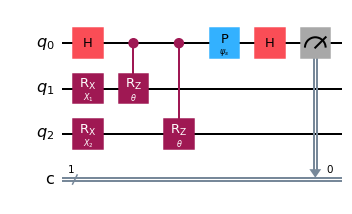

In [11]:
circuit = QuantumCircuit(3, 1)
circuit.h(0)
circuit.rx(X_rot1, 1)
circuit.rx(X_rot2, 2)
circuit.crz(Theta, 0, 1)
circuit.crz(Theta, 0, 2)
circuit.p(Phase, [0])
circuit.h(0)
circuit.measure([0], [0])

circuit.draw(output="mpl", idle_wires=False)

### IQPE algoritm

In [12]:
def iqpe(parametric_circuit, backend, theta, x1, x2, n, debug=False):
    measure = []

    for k in range(n):
        power = 2**(n - 1 - k)

        phase = 0
        for i in range(k):
            if measure[i]:
                phase = phase + (1 / (2**(k-i)))
        phase = -np.pi * phase

        circuit = parametric_circuit.assign_parameters({"$\\theta$": power * theta,"$\psi_s$": phase, "$X_1$": x1, "$X_2$": x2 })
        
        result = backend.run(circuit, shots=shots, repetition_period=None).result()

        counts = result.get_counts()

        zeros = counts.get("0", 0)
        ones = counts.get("1", 0)
        measure.append(0 if zeros > ones else 1) 
               
        d = 0
        for j,l in enumerate(measure):
            d = d + (l/(2**(n-j)))
        
        print(f"Iteration {k}: {d:.30f}")
        if debug: print(f"└─ Counts: {sorted(counts.items())}, Bits: {measure}")
        
    return d, measure

Helper function to display results:

In [13]:
def show_results():
    display(Markdown(f"<h3>{phase:.30f} $\longleftarrow$ Expected value"))
    if (x1 == np.pi and x2 == np.pi) or (x1!=x2):
        display(Markdown(f"<h3><strong>{result:.30f}</strong> $\longleftarrow$ Result</h3> "))
    else:
        display(Markdown(f"<h3><strong>{-(1-result):.30f}</strong>  $\longleftarrow$ Result</h3>"))

## Execution

### Test 1: Running on a generic emulator without noise: **AerSimulator**

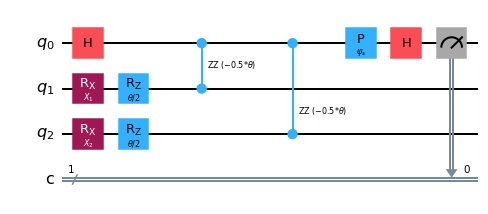

In [14]:
backend = AerSimulator()
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw(output="mpl", idle_wires=False)

In [15]:
result, measurements = iqpe(transpiled_circuit, backend, theta, x1=x1, x2=x2, n=n, debug=True)

Iteration 0: 0.000000000931322574615478515625
└─ Counts: [('1', 200)], Bits: [1]
Iteration 1: 0.000000002793967723846435546875
└─ Counts: [('1', 200)], Bits: [1, 1]
Iteration 2: 0.000000006519258022308349609375
└─ Counts: [('1', 200)], Bits: [1, 1, 1]
Iteration 3: 0.000000013969838619232177734375
└─ Counts: [('1', 200)], Bits: [1, 1, 1, 1]
Iteration 4: 0.000000013969838619232177734375
└─ Counts: [('0', 200)], Bits: [1, 1, 1, 1, 0]
Iteration 5: 0.000000043772161006927490234375
└─ Counts: [('1', 200)], Bits: [1, 1, 1, 1, 0, 1]
Iteration 6: 0.000000103376805782318115234375
└─ Counts: [('1', 200)], Bits: [1, 1, 1, 1, 0, 1, 1]
Iteration 7: 0.000000103376805782318115234375
└─ Counts: [('0', 200)], Bits: [1, 1, 1, 1, 0, 1, 1, 0]
Iteration 8: 0.000000103376805782318115234375
└─ Counts: [('0', 200)], Bits: [1, 1, 1, 1, 0, 1, 1, 0, 0]
Iteration 9: 0.000000103376805782318115234375
└─ Counts: [('0', 200)], Bits: [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
Iteration 10: 0.000000103376805782318115234375
└─ Count

In [16]:
show_results()

<h3>0.075548275373876094818115234375 $\longleftarrow$ Expected value

<h3><strong>0.075548275373876094818115234375</strong> $\longleftarrow$ Result</h3> 

### TEST 2: Runing on Qmio QPU emulator with noise: **FakeQmio**

In [17]:
backend = FakeQmio(thermal_relaxation= True, temperature=0, gate_error=True, readout_error=True)

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_25__12_00_02.json


**During transpilation we force the circuit to use qubits: 23, 20, 30**

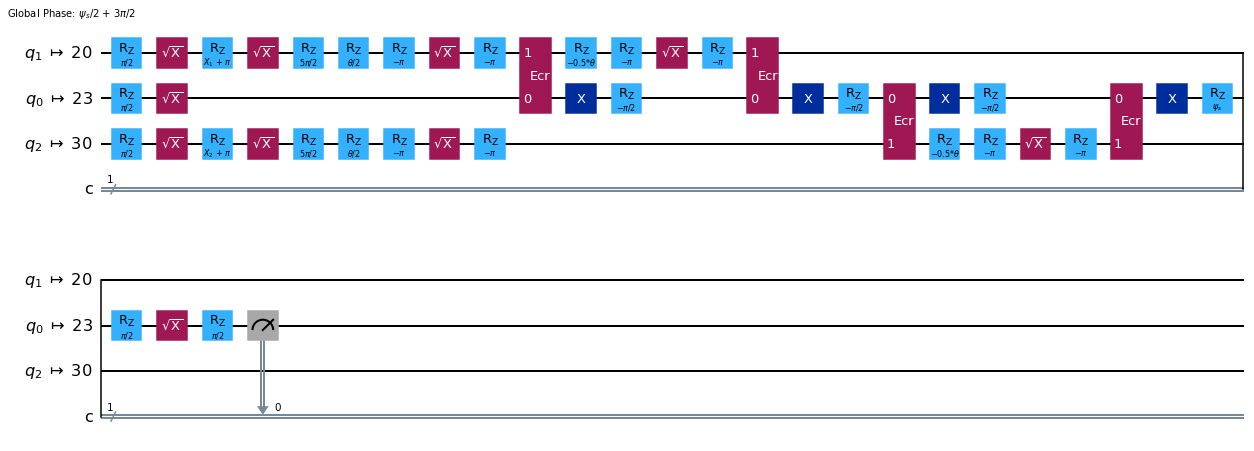

In [18]:
transpiled_circuit = transpile(circuit, backend, optimization_level=1, initial_layout=[23, 20, 30])
transpiled_circuit.draw(output="mpl", idle_wires=False)

In [19]:
result, measurements = iqpe(transpiled_circuit, backend, theta, x1=x1, x2=x2, n=n, debug=True)

Iteration 0: 0.000000000931322574615478515625
└─ Counts: [('0', 35), ('1', 165)], Bits: [1]
Iteration 1: 0.000000002793967723846435546875
└─ Counts: [('0', 34), ('1', 166)], Bits: [1, 1]
Iteration 2: 0.000000006519258022308349609375
└─ Counts: [('0', 30), ('1', 170)], Bits: [1, 1, 1]
Iteration 3: 0.000000013969838619232177734375
└─ Counts: [('0', 37), ('1', 163)], Bits: [1, 1, 1, 1]
Iteration 4: 0.000000013969838619232177734375
└─ Counts: [('0', 159), ('1', 41)], Bits: [1, 1, 1, 1, 0]
Iteration 5: 0.000000043772161006927490234375
└─ Counts: [('0', 33), ('1', 167)], Bits: [1, 1, 1, 1, 0, 1]
Iteration 6: 0.000000103376805782318115234375
└─ Counts: [('0', 43), ('1', 157)], Bits: [1, 1, 1, 1, 0, 1, 1]
Iteration 7: 0.000000103376805782318115234375
└─ Counts: [('0', 160), ('1', 40)], Bits: [1, 1, 1, 1, 0, 1, 1, 0]
Iteration 8: 0.000000103376805782318115234375
└─ Counts: [('0', 167), ('1', 33)], Bits: [1, 1, 1, 1, 0, 1, 1, 0, 0]
Iteration 9: 0.000000103376805782318115234375
└─ Counts: [('0', 

In [20]:
show_results()

<h3>0.075548275373876094818115234375 $\longleftarrow$ Expected value

<h3><strong>0.075548275373876094818115234375</strong> $\longleftarrow$ Result</h3> 

## TEST 3: Running on Qmio Real QPU: **QmioBackend**

In [21]:
backend = QmioBackend()

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_25__12_00_02.json


In [22]:
transpiled_circuit = transpile(circuit, backend, optimization_level=1, initial_layout=[23, 20, 30])

In [23]:
result, measurements = iqpe(transpiled_circuit, backend, theta, x1=x1, x2=x2, n=n, debug=True)

Iteration 0: 0.000000000931322574615478515625
└─ Counts: [('0', 53), ('1', 147)], Bits: [1]
Iteration 1: 0.000000002793967723846435546875
└─ Counts: [('0', 40), ('1', 160)], Bits: [1, 1]
Iteration 2: 0.000000006519258022308349609375
└─ Counts: [('0', 31), ('1', 169)], Bits: [1, 1, 1]
Iteration 3: 0.000000013969838619232177734375
└─ Counts: [('0', 36), ('1', 164)], Bits: [1, 1, 1, 1]
Iteration 4: 0.000000013969838619232177734375
└─ Counts: [('0', 140), ('1', 60)], Bits: [1, 1, 1, 1, 0]
Iteration 5: 0.000000043772161006927490234375
└─ Counts: [('0', 52), ('1', 148)], Bits: [1, 1, 1, 1, 0, 1]
Iteration 6: 0.000000103376805782318115234375
└─ Counts: [('0', 42), ('1', 158)], Bits: [1, 1, 1, 1, 0, 1, 1]
Iteration 7: 0.000000103376805782318115234375
└─ Counts: [('0', 145), ('1', 55)], Bits: [1, 1, 1, 1, 0, 1, 1, 0]
Iteration 8: 0.000000103376805782318115234375
└─ Counts: [('0', 150), ('1', 50)], Bits: [1, 1, 1, 1, 0, 1, 1, 0, 0]
Iteration 9: 0.000000103376805782318115234375
└─ Counts: [('0', 

In [24]:
show_results()

<h3>0.075548275373876094818115234375 $\longleftarrow$ Expected value

<h3><strong>0.075548275373876094818115234375</strong> $\longleftarrow$ Result</h3> 

## Acknowledgements

<center><img src="https://www.cesga.es/wp-content/uploads/2023/10/Cartel-FEDER-CUANTICA_vsetembro23-600x429.png" /></center>